# Import libraries

In [2]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  classification_report, confusion_matrix

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Loading the dataset

In this section, we will load the Titanic dataset into the notebook. The dataset is stored in two CSV files, one for the training data and one for the test data. We will use the pandas library to load the CSV files into dataframes that we can manipulate and explore. Once loaded, we can begin to explore the data and prepare it for machine learning modeling

In [3]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")

# Data Exploration and Preparation

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


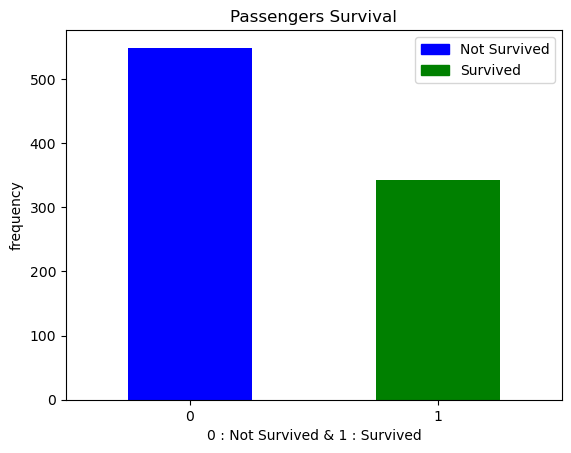

In [5]:
colors = {'Not Survived':'blue', 'Survived':'green'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
train_data["Survived"].value_counts().plot(kind="bar",color=colors.values())
plt.title("Passengers Survival")
plt.ylabel("frequency")
plt.xlabel("0 : Not Survived & 1 : Survived")
plt.legend(handles, labels)
plt.xticks(rotation=0)
plt.show()

In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

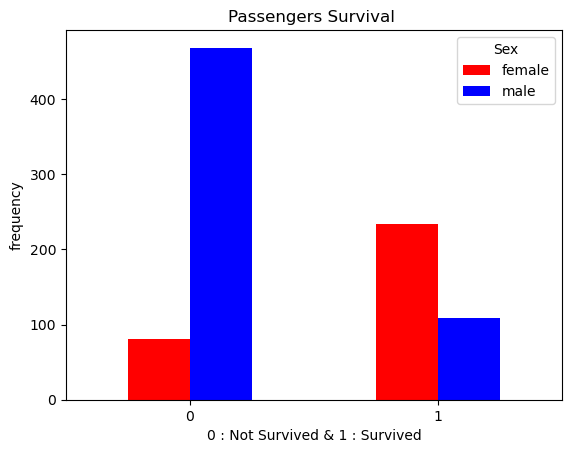

In [8]:
pd.crosstab(train_data.Survived,train_data.Sex).plot(kind="bar",color=["red","blue"])
plt.title("Passengers Survival ")
plt.ylabel("frequency")
plt.xlabel("0 : Not Survived & 1 : Survived")
plt.xticks(rotation=0)
plt.show()

In [9]:
x=train_data.iloc[:,2:-1]
y=train_data.iloc[:,1].values

In [10]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN


In [11]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

# Removing Unwanted Fetures

In [12]:
x=x.drop(["Name","Ticket","Fare","Cabin"],axis=1)
x.values

array([[3, 'male', 22.0, 1, 0],
       [1, 'female', 38.0, 1, 0],
       [3, 'female', 26.0, 0, 0],
       ...,
       [3, 'female', nan, 1, 2],
       [1, 'male', 26.0, 0, 0],
       [3, 'male', 32.0, 0, 0]], dtype=object)

In [13]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
dtype: int64

In [14]:
x["Age"].fillna(x["Age"].mean(),inplace=True)
x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64

In [15]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
x=encoder.fit_transform(x)

# split train data

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [17]:
x_train

array([[ 2.,  1., 37.,  0.,  0.],
       [ 1.,  0., 35.,  0.,  0.],
       [ 2.,  0., 39.,  1.,  0.],
       ...,
       [ 0.,  1., 39.,  0.,  0.],
       [ 2.,  1., 16.,  1.,  0.],
       [ 1.,  1., 49.,  0.,  0.]])

# Modeling

In [18]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} accuracy: {scores.mean():.3f} +/- {scores.std():.3f}")

        # Fit the model to the full training set and make predictions on the test set
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

Logistic Regression accuracy: 0.792 +/- 0.027
Accuracy: 0.810
Precision: 0.719
Recall: 0.742
F1-score: 0.730

Decision Tree accuracy: 0.793 +/- 0.014
Accuracy: 0.838
Precision: 0.770
Recall: 0.758
F1-score: 0.764

Random Forest accuracy: 0.798 +/- 0.022
Accuracy: 0.816
Precision: 0.738
Recall: 0.726
F1-score: 0.732



**After comparing the accuracy of several models, we found that the DecisionTreeClassifier model had the highest accuracy**

**So I will use it to make a prediction to the test set.**

In [19]:
model= DecisionTreeClassifier()
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print(f"{model} accuracy: {scores}")
    
# Fit the model to the full training set and make predictions on the test set
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# Evaluate the model on the test set
acc = accuracy_score(y_test, y_pred)
print (acc)

DecisionTreeClassifier() accuracy: [0.7972028  0.81818182 0.78169014 0.78169014 0.78873239]
0.8268156424581006


In [20]:
confusion_matrix(y_test, y_pred)

array([[102,  15],
       [ 16,  46]])

Text(50.722222222222214, 0.5, 'Predicted value')

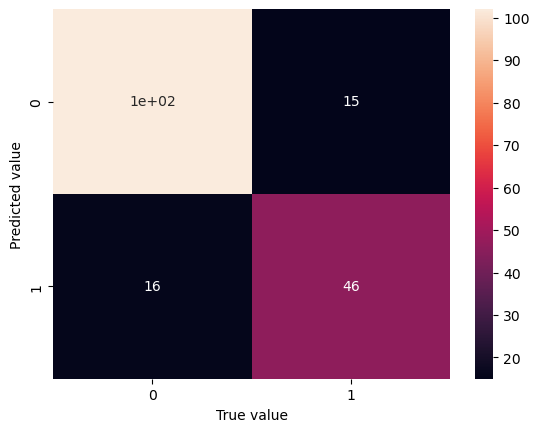

In [21]:
#sns.set(font_scale= 1.5)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
plt.xlabel("True value")
plt.ylabel("Predicted value")

# Test data preparation

In [22]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
test=test_data.iloc[:,1:-1]


In [24]:
test=test.drop(["Name","Ticket","Fare","Cabin"],axis=1)
test.values

array([[3, 'male', 34.5, 0, 0],
       [3, 'female', 47.0, 1, 0],
       [2, 'male', 62.0, 0, 0],
       ...,
       [3, 'male', 38.5, 0, 0],
       [3, 'male', nan, 0, 0],
       [3, 'male', nan, 1, 1]], dtype=object)

In [25]:
test["Age"].fillna(test["Age"].mean(),inplace=True)
test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
dtype: int64

In [26]:
test.describe()

,Pclass,Age,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344
std,0.841838,12.634534,0.896760,0.981429
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000
50%,3.000000,30.272590,0.000000,0.000000
75%,3.000000,35.750000,1.000000,0.000000
max,3.000000,76.000000,8.000000,9.000000


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.5+ KB


In [28]:
test = encoder.fit_transform(test)

# Predictions and Submission

In [29]:
result=model.predict(test)
result

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
result = pd.DataFrame(result, columns=['Survived'])

In [31]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': result.Survived})
output.to_csv('submission.csv', index=False)

In [32]:
a=pd.read_csv('/kaggle/working/submission.csv')
a

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
